[1.5, 0.75, 0.1]
[2, 2.2, 0.1]


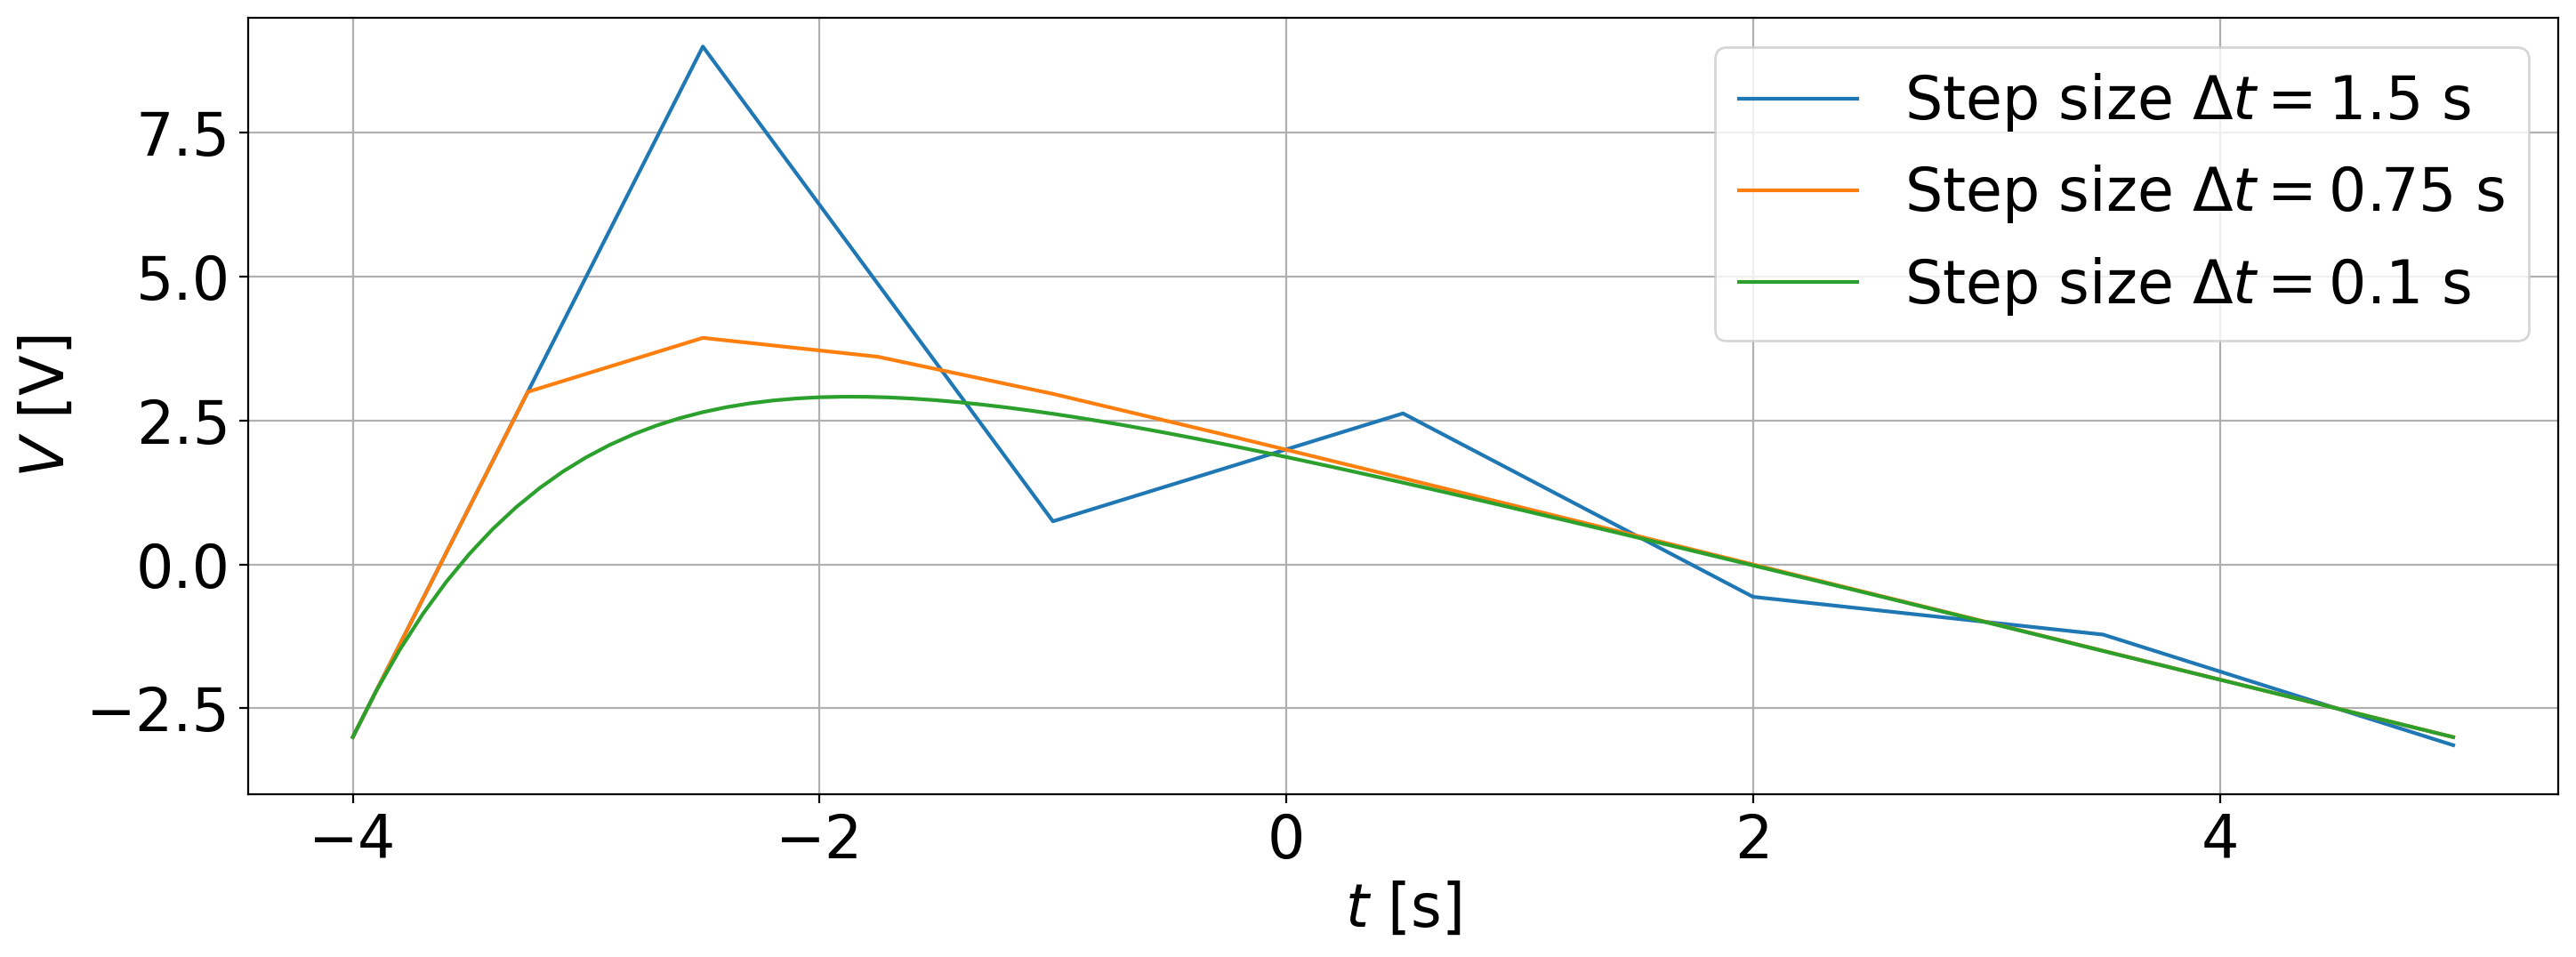

[2, 2.2, 0.1]
[2, 2.2, 0.1]
true


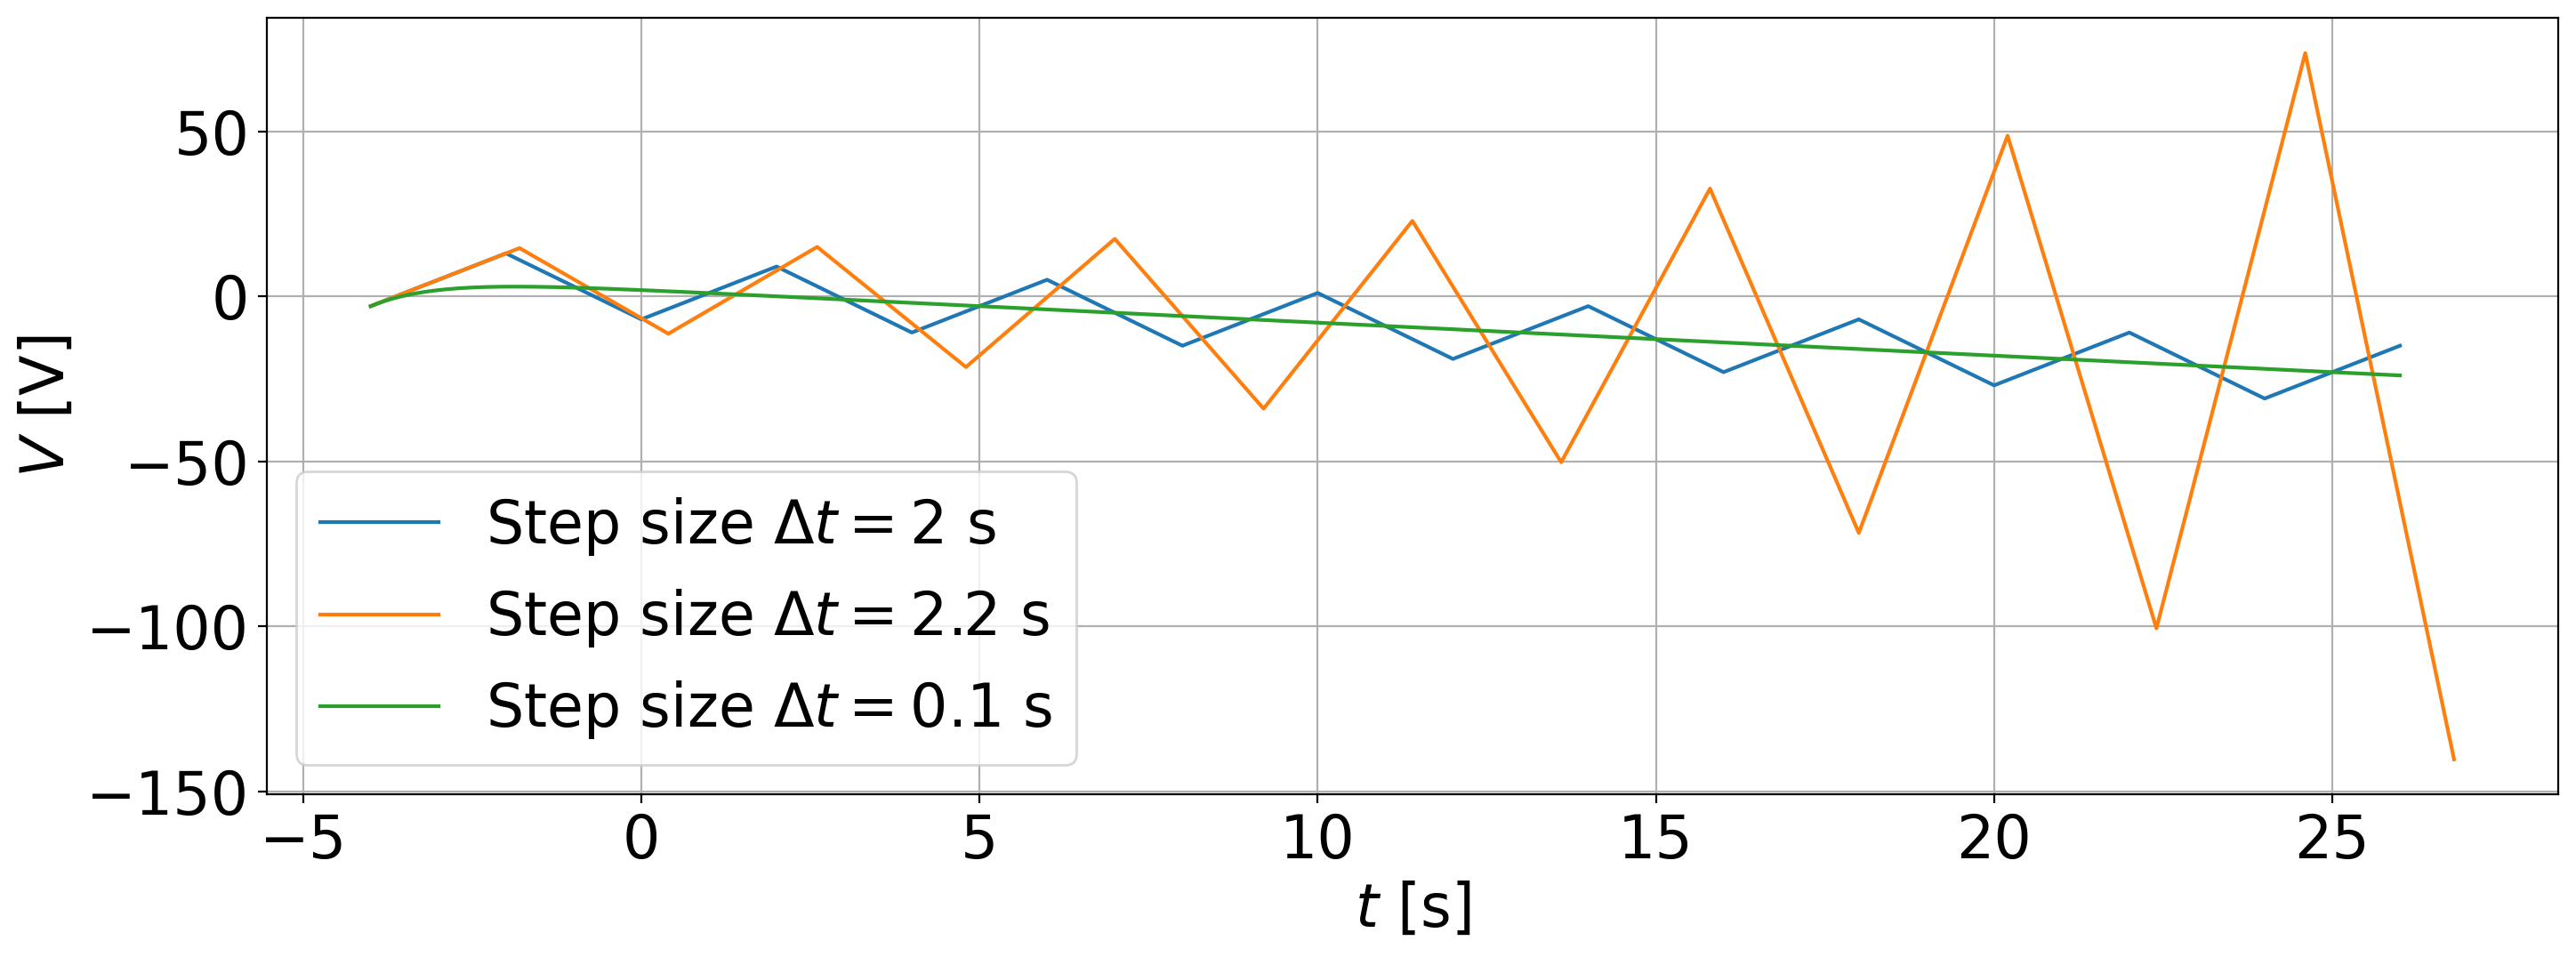

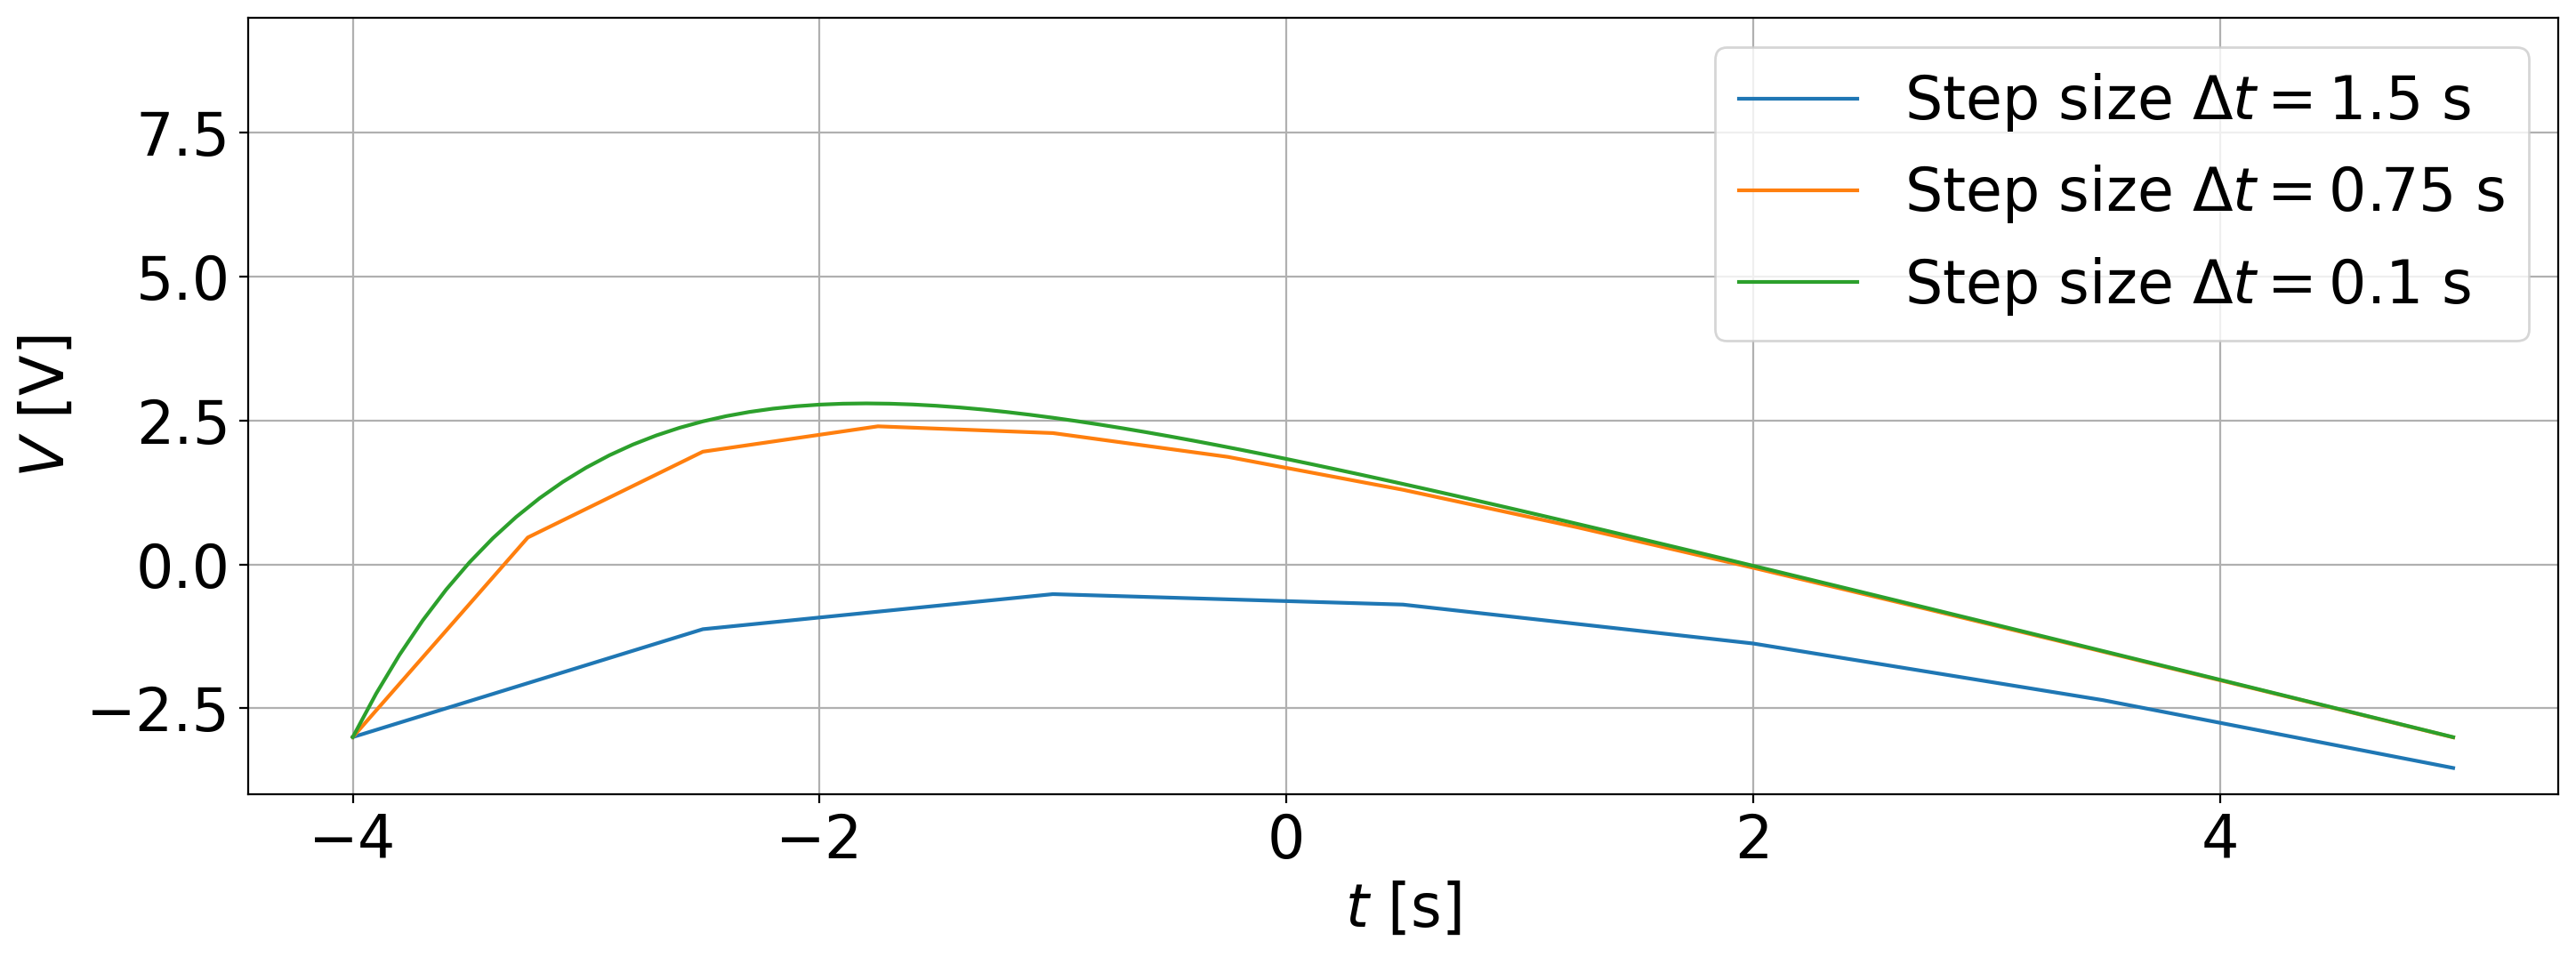

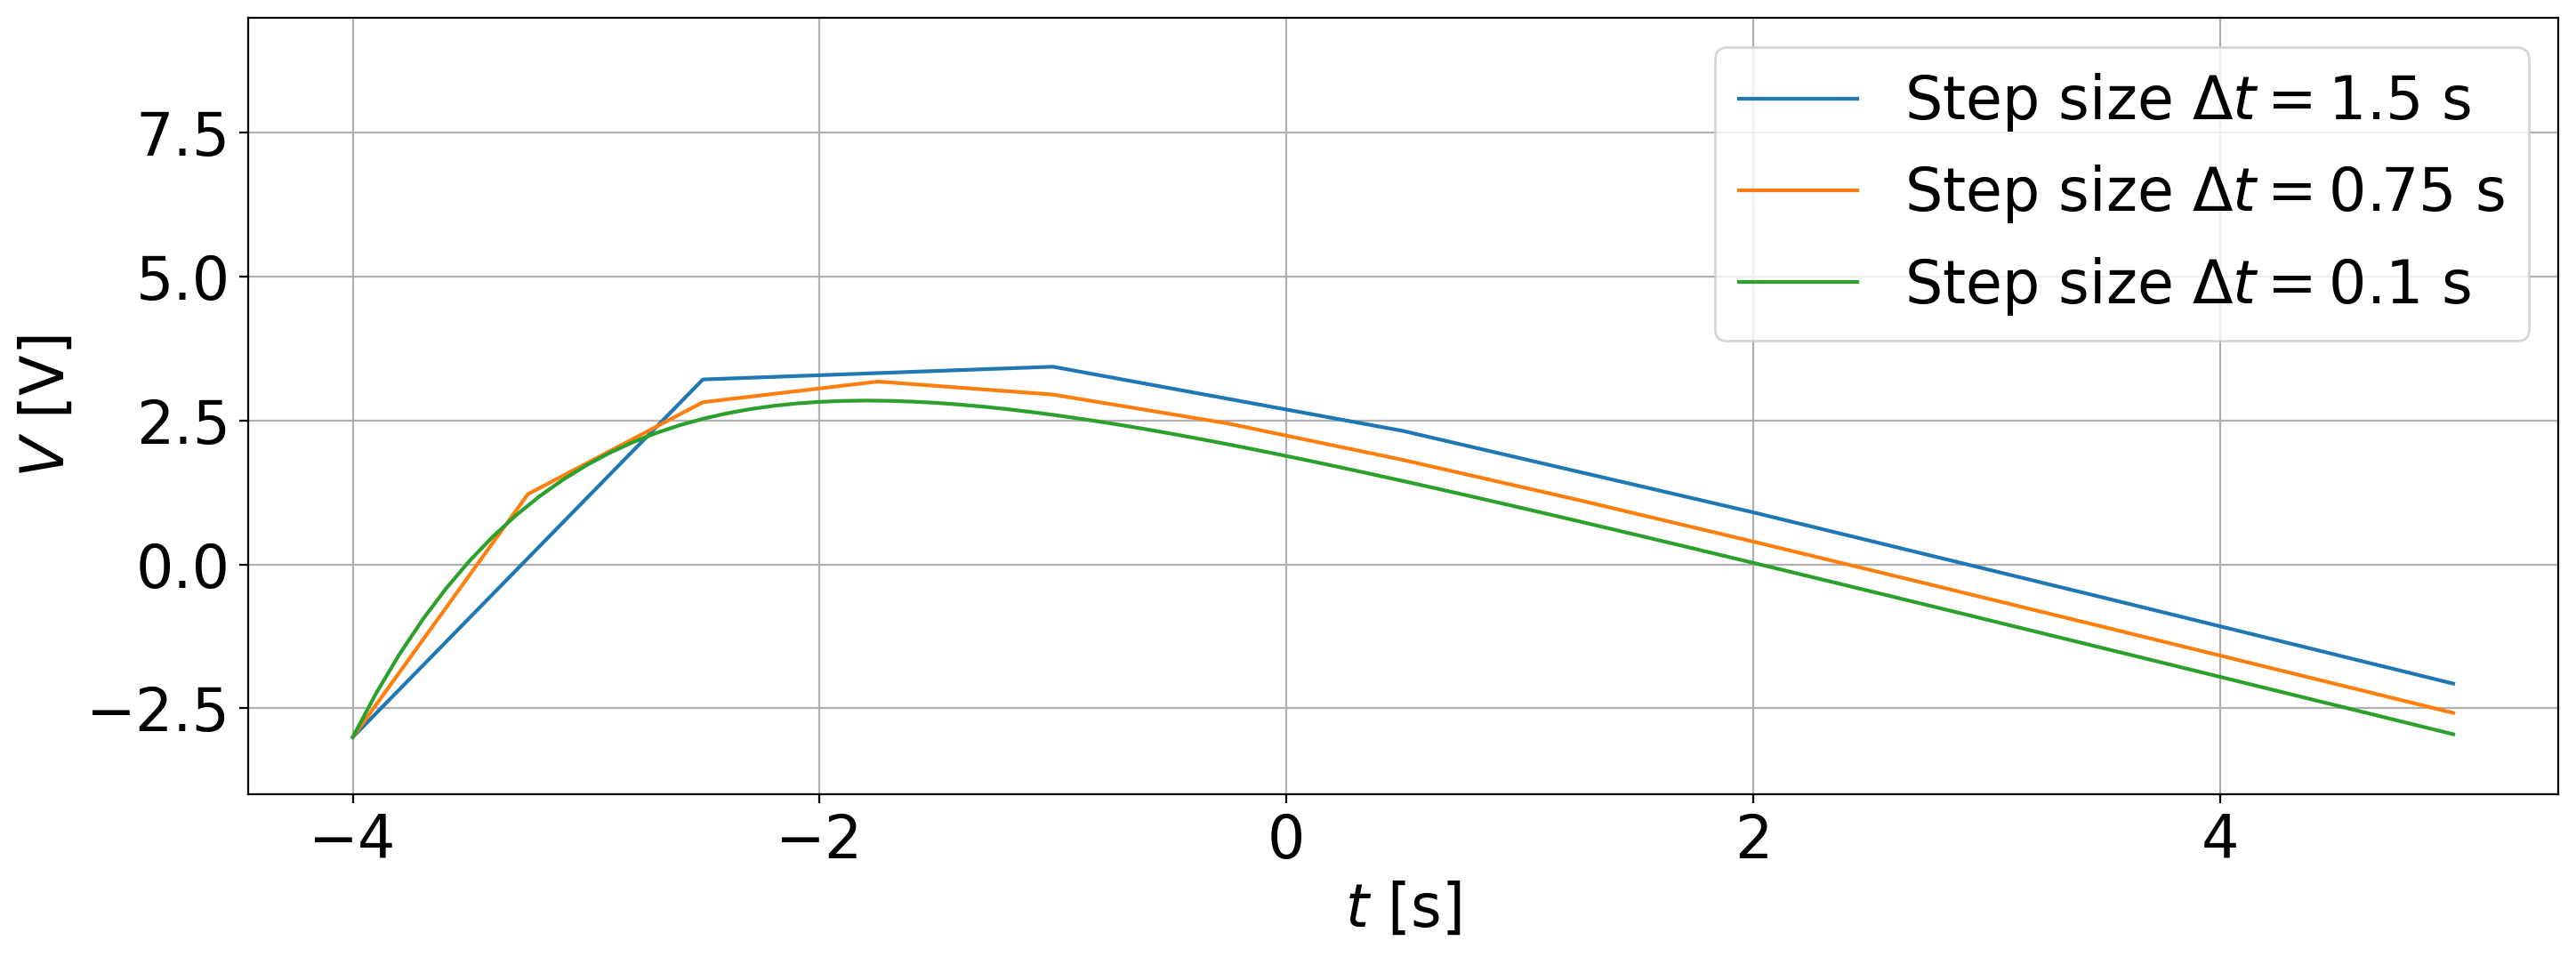

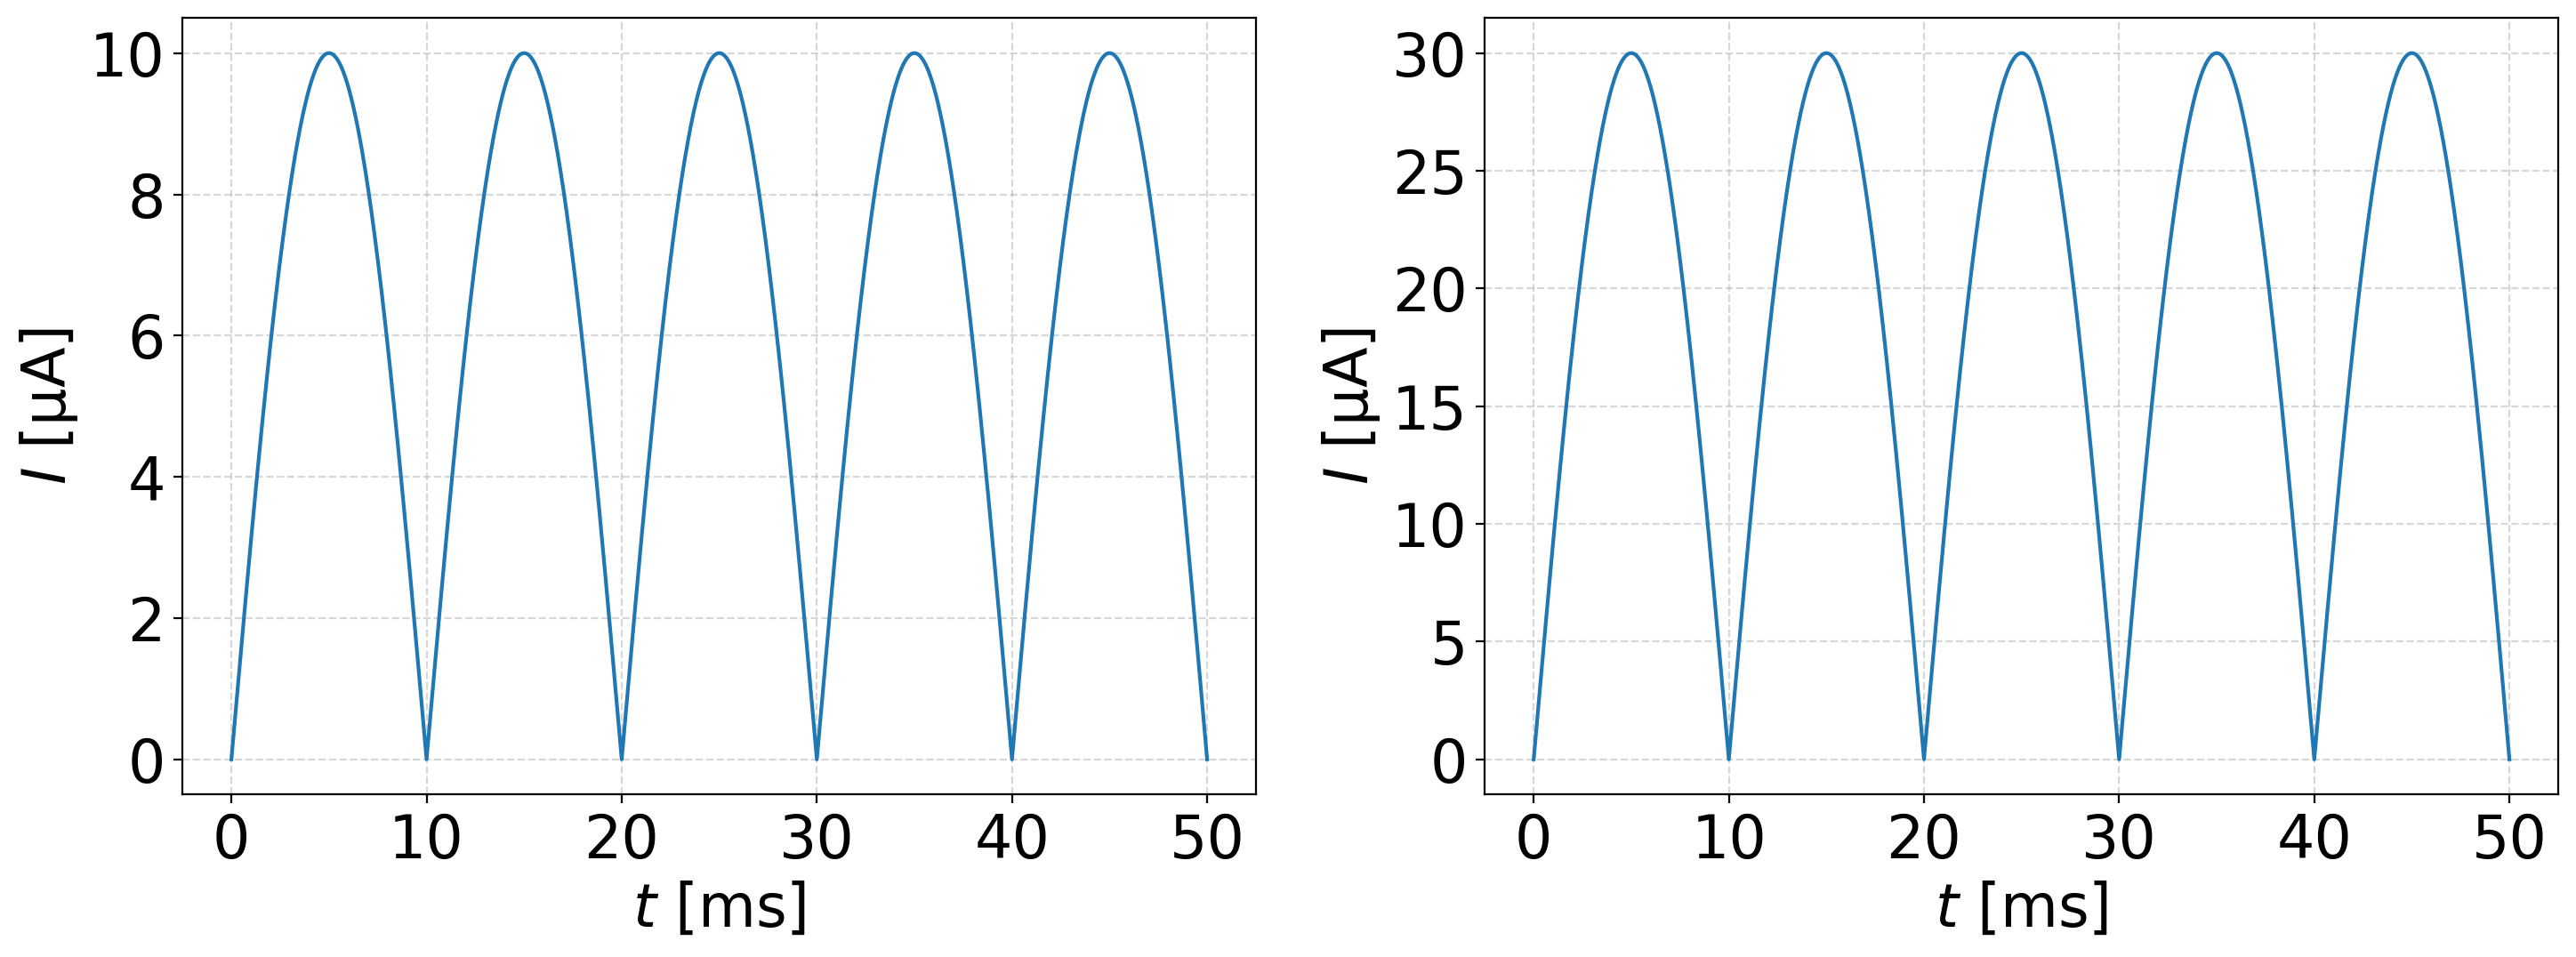

0
1


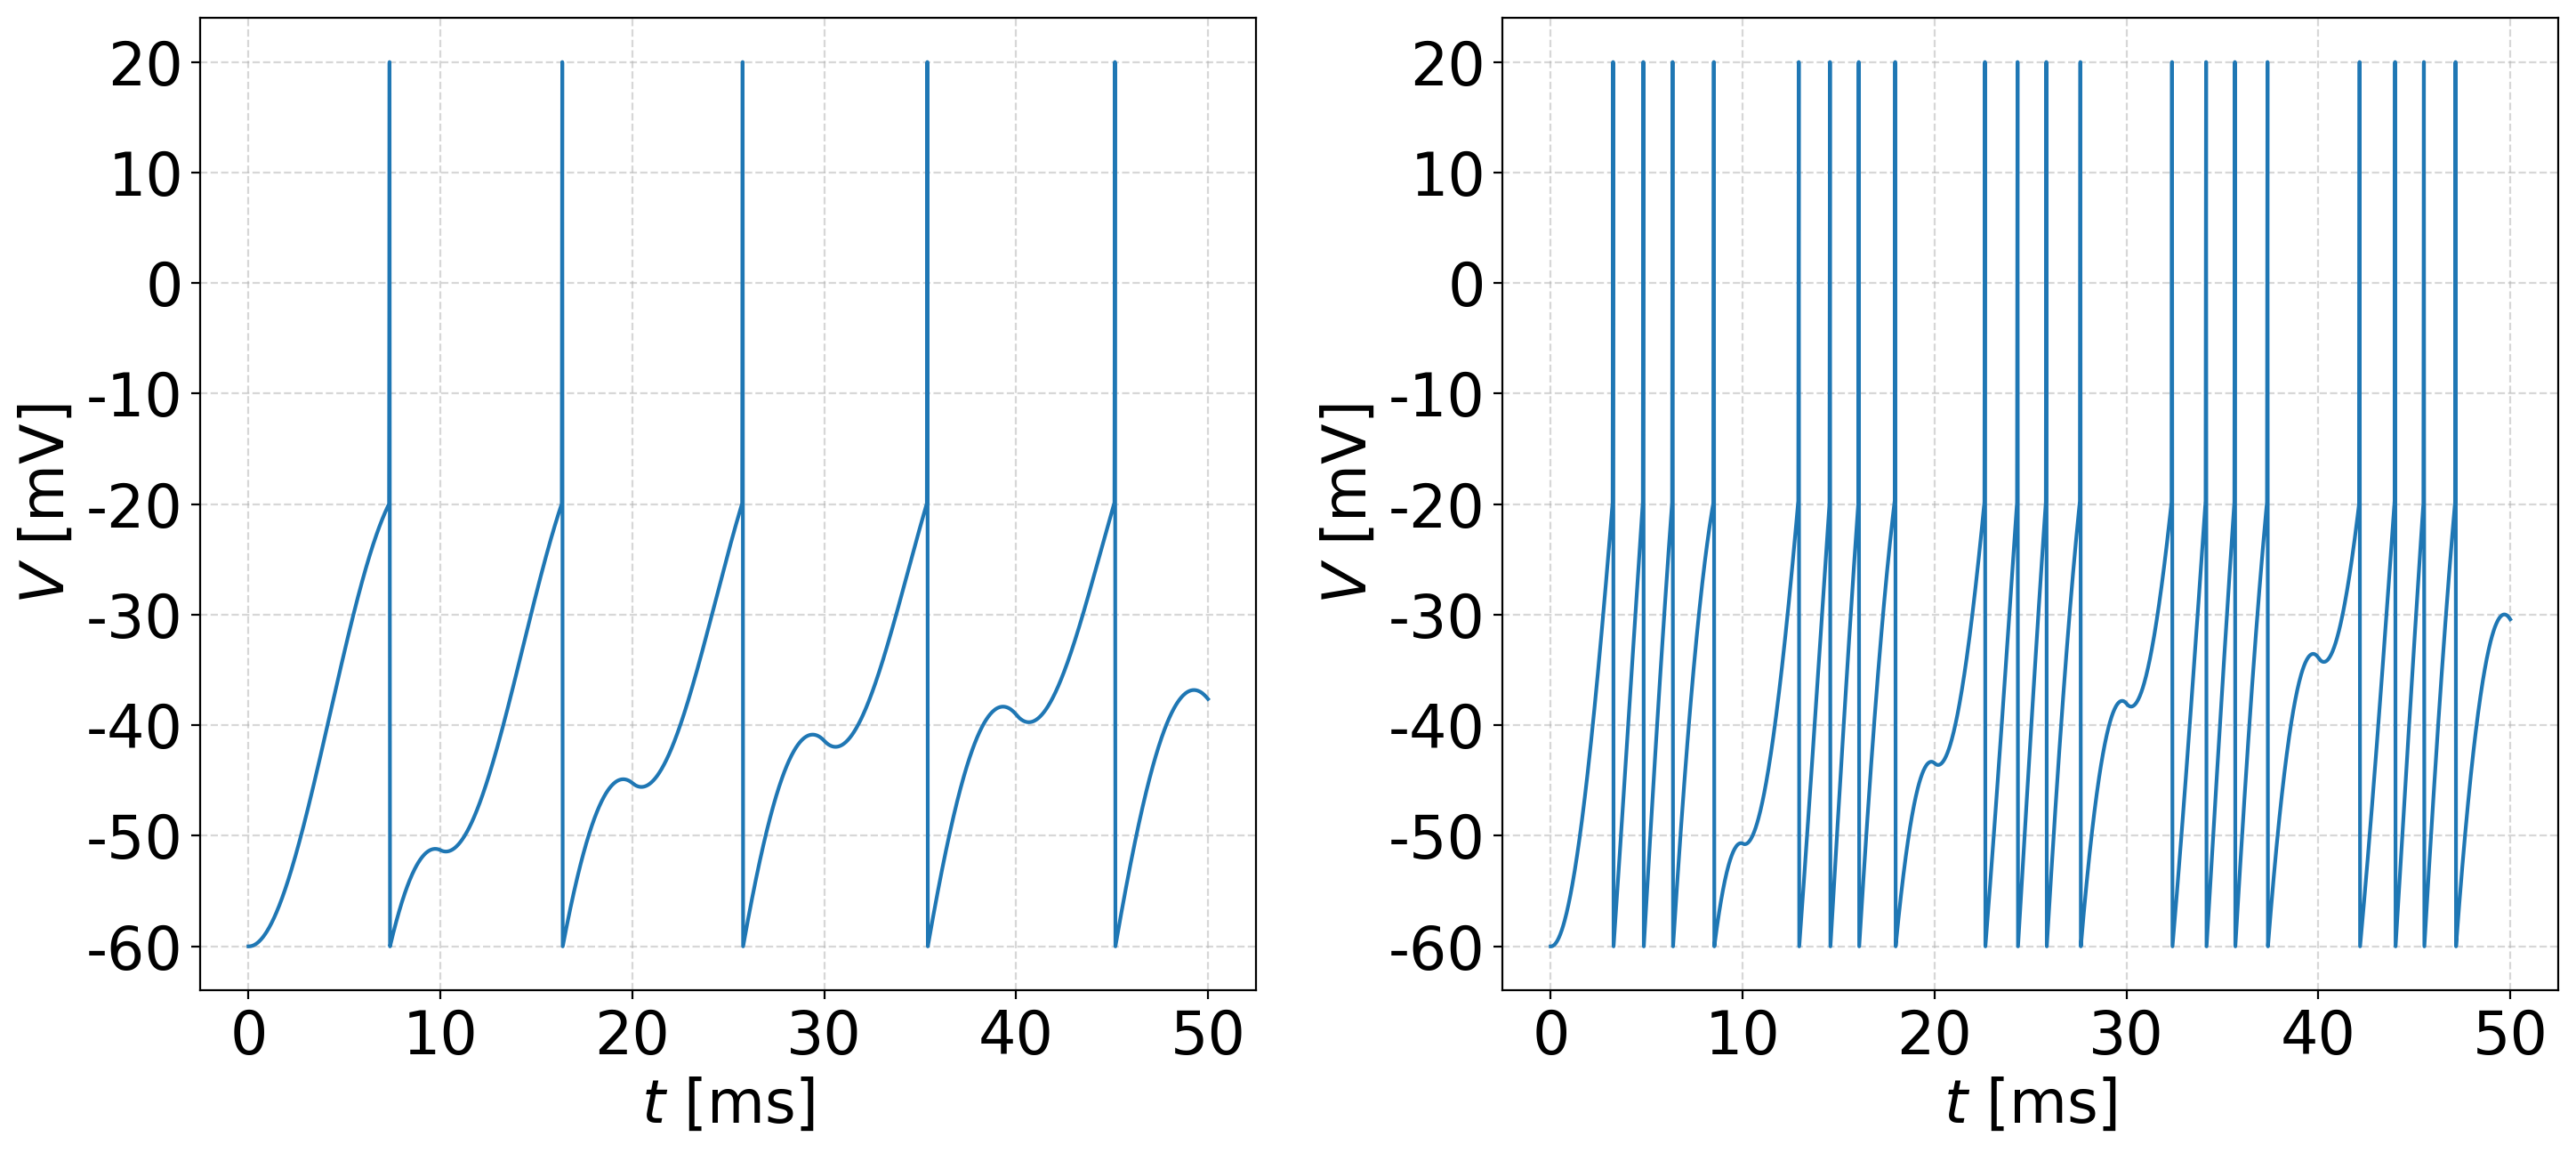

In [1]:
import numpy as np
import matplotlib.pyplot as plt

f1 = lambda V , t: -V + 1-t
f1.__name__ = "f1"

plt.rcParams.update({"font.size": 24})
plt.rcParams["figure.dpi"] = 200
plt.rcParams["figure.figsize"] = [7.5*2,5.9]

stepsizes = [1.5,0.75,0.1]
stepsizes2 = [2,2.2,0.1]
starttime = -4
duration = 9
duration2 = 30
initial_value = -3

def plot (kind):
    plt.legend()
    plt.xlabel("$t$ [s]")
    plt.ylim(-4,9.5)
    plt.ylabel("$V$ [V]")
    plt.grid()
    plt.tight_layout()
    plt.savefig(f"ODE_solver_{kind}.pdf")
    plt.show()

def ODE_solver_Euler(function, stepsize, starttime, duration, initial_value):

    for s in stepsize:
        t = np.arange(starttime, (starttime+duration) + s, s)
        
        V = np.zeros(len(t))
        V[0] = initial_value
        
        for i in range(0, len(t) - 1):
            V[i + 1] = V[i] + s*function(t[i],V[i])
    
        plt.plot(t, V, label=f'Step size $\Delta t=${s} s')
    
    print(stepsize)
    print(stepsizes2)
    if stepsize == stepsizes2:
        print("true")
        plt.legend()
        plt.xlabel("$t$ [s]")
        plt.ylabel("$V$ [V]")
        plt.grid()
        plt.tight_layout()
        plt.savefig(f"extra.pdf")
        plt.show()
    else:
        plot("Euler")

def ODE_solver_Heun(function, stepsize, starttime, duration, initial_value):

    for s in stepsize:
        t = np.arange(starttime, (starttime+duration) + s, s)
        V = np.zeros(len(t))
        V_2 = np.zeros(len(t))
        
        V[0] = initial_value
    
        for i in range(0, len(t) - 1):
            V_2[i+1] = V[i] + s * function(t[i], V[i])
            V[i + 1] = V[i] + 0.5*(function(t[i], V[i]) + function(V_2[i + 1],t[i+1]))*s

            
        plt.plot(t, V, label=f'Step size $\Delta t=${s} s')
        
    plot("Heun")

def ODE_solver_exp_Euler(function, stepsize, starttime, duration, initial_value):

    for s in stepsize:
        t = np.arange(starttime, (starttime+duration) + s, s)
    
        V = np.zeros(len(t))
        V[0] = initial_value
        
        for i in range(0, len(t) - 1):
            V[i + 1] = V[i]*np.exp(-s) - (1 - t[i])*(np.exp(-s)-1)

        plt.plot(t, V, label=f'Step size $\Delta t=${s} s')
    plot("exp_Euler")
    
ODE_solver_Euler(f1,stepsizes,starttime, duration, initial_value)
ODE_solver_Euler(f1,stepsizes2,starttime, duration2, initial_value)
ODE_solver_Heun(f1,stepsizes,starttime, duration, initial_value)
ODE_solver_exp_Euler(f1,stepsizes,starttime, duration, initial_value)


duration = 50e-3
stepsize = 25e-6
frequency= 50

def plotintputs(amplitudes):
    fig1, axs1 = plt.subplots(1,2)
    c = 0
    t = np.arange(0, duration + stepsize, stepsize)
    for i in amplitudes:
        V = np.abs(i*np.sin(2*np.pi*frequency*t))
        axs1[c].plot(t, V)
        

        xticks=np.arange(0,60,10)
        axs1[c].set_xticks(xticks*1e-3)
        axs1[c].set_xticklabels(xticks)
        axs1[c].set_xlabel("$t$ [ms]")
    
        
        yticks1=np.arange(0,12,2)
        yticks2=np.arange(0,35,5)
        if c==0:
            axs1[c].set_yticks(yticks1*1e-6)
            axs1[c].set_yticklabels(yticks1)
        else:
            axs1[c].set_yticks(yticks2*1e-6)
            axs1[c].set_yticklabels(yticks2)
        axs1[c].set_ylabel("$I$ [$\mathrm{\mu}$A]")
        axs1[c].grid(True, alpha=0.5, linestyle="--")
        c += 1
        
    fig1.tight_layout()
    plt.savefig(f"input.pdf")
    plt.show()
    
            
        

def LIFNM(stepsize, duration):
    fig2, axs2 = plt.subplots(1,2, figsize=(15,7))
    
    C_m=1e-6
    g_leak=100e-6
    V_rest= -60e-3
    V_thr= -20e-3
    V_spike=20e-3
    t = np.arange(0, duration + stepsize, stepsize)
    V = np.zeros(len(t))
    V[0] = V_rest
    c_2 = 0
    for j in amplitudes:  
        for i in range(0, len(t) - 1):
            if V[i] < V_thr:
                V[i+1] =  V[i]+(stepsize/C_m)*(-g_leak*(V[i]-V_rest)+ np.abs(j*np.sin(2*np.pi*frequency*t[i])))
            elif V_thr <= V[i] < V_spike:
                V[i+1] = V_spike
            elif V_spike <= V[i]:
                V[i+1] = V_rest         
            else:
                print("error")
        print(c_2)
    
        axs2[c_2].plot(t, V)
        
        xticks=np.arange(0,60,10)
        axs2[c_2].set_xticks(xticks*1e-3)
        axs2[c_2].set_xticklabels(xticks)
        axs2[c_2].set_xlabel("$t$ [ms]")
    
        
        yticks=np.arange(-60,30,10)
        axs2[c_2].grid(True, alpha=0.5, linestyle="--")
        axs2[c_2].set_yticks(yticks*1e-3)
        axs2[c_2].set_yticklabels(yticks)
        axs2[c_2].set_ylabel("$V$ [mV]")
        c_2+=1
        
    fig2.tight_layout()
    plt.savefig(f"output.pdf")
    plt.show()
        

amplitudes = [10e-6,30e-6]
plotintputs(amplitudes)

LIFNM(25e-6, 50e-3)


